##### Copyright 2025 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
%pip uninstall -qqy jupyterlab kfp
%pip install -U -q "google-genai==1.7.0"

Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from google import genai
from google.genai import types

genai.__version__

'1.7.0'

In [5]:
import os

GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

In [6]:
client = genai.Client(api_key=GOOGLE_API_KEY)

In [7]:
for model in client.models.list():
    if 'embedContent' in model.supported_actions:
        print(model.name)

models/embedding-001
models/text-embedding-004
models/gemini-embedding-exp-03-07
models/gemini-embedding-exp


## 유사도 점수 계산
이 예시는 팬그램 "The quick brown fox jumps over the lazy dog"의 몇 가지 변형을 포함하고 있으며, 여기에는 철자 오류와 문구의 축약형이 포함됩니다. 비교를 위해 다른 팬그램과 다소 관련 없는 문구가 포함되었습니다.

이 작업에서는 임베딩을 사용하여 유사도 점수를 계산하므로 이러한 임베딩의 task_type은 semantic_similarity입니다. 전체 작업 목록은 API 참조를 확인하세요.

In [8]:
texts = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick rbown fox jumps over the lazy dog.',
    'teh fast fox jumps over the slow woofer.',
    'a quick brown fox jmps over lazy dog.',
    'brown fox jumping over dog',
    'fox > dog',
    # Alternative pangram for comparison:
    'The five boxing wizards jump quickly.',
    # Unrelated text, also for comparison:
    'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vivamus et hendrerit massa. Sed pulvinar, nisi a lobortis sagittis, neque risus gravida dolor, in porta dui odio vel purus.',
]


In [9]:
reponse = client.models.embed_content(
    model='models/text-embedding-004',
    contents=texts,
    config=types.EmbedContentConfig(
        task_type='semantic_similarity'
    )
)

In [10]:
def truncate(t: str, limit: int = 50) -> str:
    """Truncate labels to fit on the chart."""
    if len(t) > limit:
        return t[:limit-3] + '...'
    else:
        return t

truncated_texts = [truncate(t) for t in texts]

In [11]:
truncated_texts

['The quick brown fox jumps over the lazy dog.',
 'The quick rbown fox jumps over the lazy dog.',
 'teh fast fox jumps over the slow woofer.',
 'a quick brown fox jmps over lazy dog.',
 'brown fox jumping over dog',
 'fox > dog',
 'The five boxing wizards jump quickly.',
 'Lorem ipsum dolor sit amet, consectetur adipisc...']

In [16]:
%pip install -qq pandas seaborn

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame([e.values for e in reponse.embeddings], index=truncated_texts)

In [21]:
sim = df @ df.T

<Axes: >

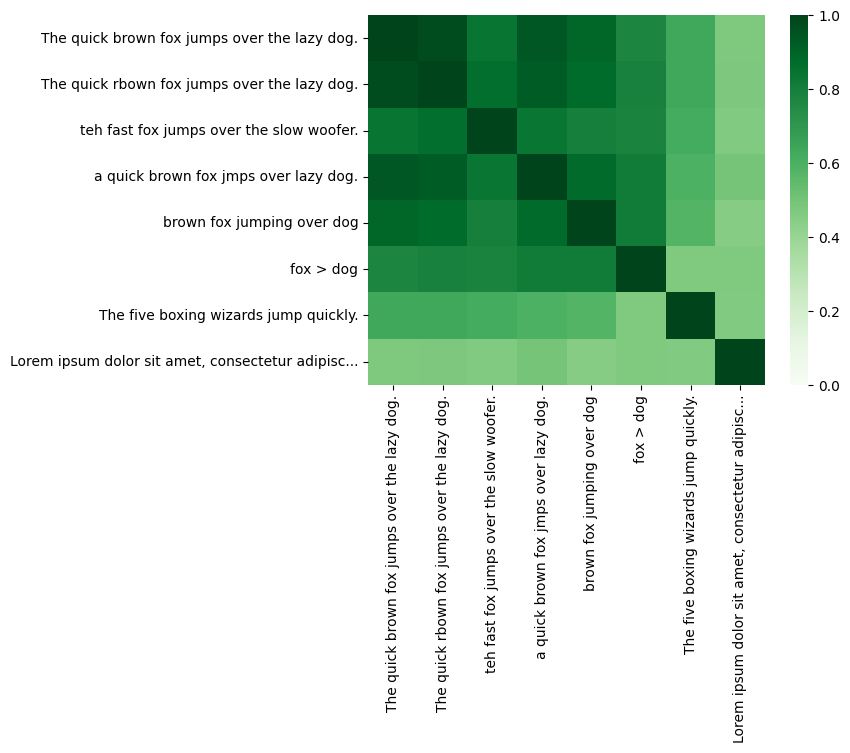

In [22]:
sns.heatmap(sim, vmin=0, vmax=1, cmap="Greens")

In [24]:
sim['The quick brown fox jumps over the lazy dog.'].sort_values(ascending=False)

The quick brown fox jumps over the lazy dog.          0.999999
The quick rbown fox jumps over the lazy dog.          0.975623
a quick brown fox jmps over lazy dog.                 0.939730
brown fox jumping over dog                            0.894507
teh fast fox jumps over the slow woofer.              0.842152
fox > dog                                             0.776455
The five boxing wizards jump quickly.                 0.635346
Lorem ipsum dolor sit amet, consectetur adipisc...    0.472174
Name: The quick brown fox jumps over the lazy dog., dtype: float64